In [84]:
from bidi.algorithm import get_display
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import arabic_reshaper
import pandas as pd
import re
import string

In [130]:
data = pd.read_excel("data.xlsx", index_col=0)
data.columns = ["question"]
data.head()

,question
0,لأهل العراق: كيف الحياة في العراق الآن من ناحي...
1,أنا شيعي من العراق ما هي نظرتك لي؟
2,هل يحب العراق صدام حسين؟
3,أنا مغرم باللهجة العراقية، كيف يمكنني إتقانها ...
4,هل العراقيات جميلات والعراقيين وسيمين؟ لنرى آر...


## Remove Diacritics

In [131]:
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

## Normalize

In [132]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    # unwant_words = ["لماذا", "هل", "لا", "كيف", "مع", "ماذا", "في", "على", "لم", "هي", "ما", "هو", "او", "الذي", "كان", "ام", "من", "عن", "بين", "مثل", "التي", "لو"]
    # for i in unwant_words:
    #   text = re.sub(i, "", text)
    return text

## Remove Punctuations

In [133]:
def remove_punctuations(text):
  arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
  english_punctuations = string.punctuation
  punctuations_list = arabic_punctuations + english_punctuations

  translator = str.maketrans('', '', punctuations_list)
  return text.translate(translator)

## Generate Word Cloud

In [134]:
text = " ".join(data["question"].tolist())
text = normalize_arabic(text)
text = remove_punctuations(text)
text = remove_diacritics(text)

In [135]:
def arabic_word_cloud(text):
  text = text
  wordcloud = WordCloud(font_path='arabic_2.otf').generate(text)
  
  return wordcloud.to_image()

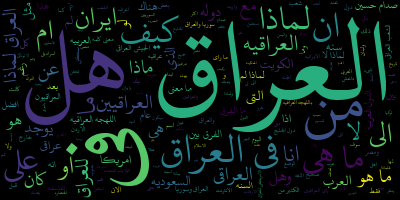

In [136]:
arabic_word_cloud(text)